# Assignment 5 - Group 9

Jonas Röst & Kailash de Jesus Hornig  

In [1]:
#Installing or importing Keras and Pillow library 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import numpy as np
plt.style.use('seaborn-v0_8')

2023-03-03 14:02:00.765061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 14:02:00.963605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-03 14:02:00.963662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-03 14:02:01.004219: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-03 14:02:03.117142: W tensorflow/stream_executor/pla

In [2]:
# Loading images from training and validation directory

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' 
img_size = 64
batch_size = 32
nr_of_epochs = 10

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1234,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 574 images belonging to 2 classes.


In [3]:
# Get a batch of images
Xbatch, Ybatch = train_generator.next()

(32, 64, 64, 3)
1.0


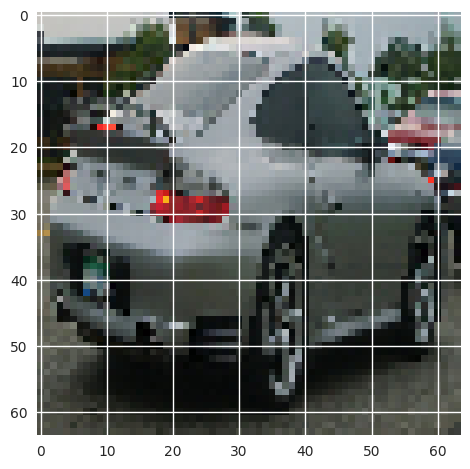

In [4]:
# take a look at a pitcure
print(Xbatch.shape)
print(Ybatch[0])

plt.imshow(Xbatch[0]);

# Training a convolutional neural network

In [5]:
"""
Architecture inpired by the layers from the lecture example
"""

def make_convnet():
    model = keras.Sequential()

    #Convolutional and Pooling layers
    model.add(layers.Conv2D(32, 4, activation="relu", input_shape = (64, 64, 3)))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides = (2,2)))
    model.add(layers.Conv2D(32, 6, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(32, 4, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [6]:
# Function used to make plots
def plot_val_and_training(history_object, metrics):
    for metric in metrics:
        values = history_object.history.get(metric)
        plt.plot(list(range(nr_of_epochs)), values, label = metric)
    plt.title("Traning {} vs {}".format(metrics[0], metrics[1]))
    plt.ylabel(metrics[0])
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

In [7]:
convnet = make_convnet()

history = convnet.fit(train_generator, batch_size = batch_size, epochs = nr_of_epochs, validation_data = validation_generator)

2023-03-03 14:02:08.989942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-03 14:02:08.989985: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-03 14:02:08.990010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-9a2f6166-b39d-417b-9119-b5ef86702171): /proc/driver/nvidia/version does not exist
2023-03-03 14:02:08.990316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/10
50/50 [==============================] - 28s 529ms/step - loss: 0

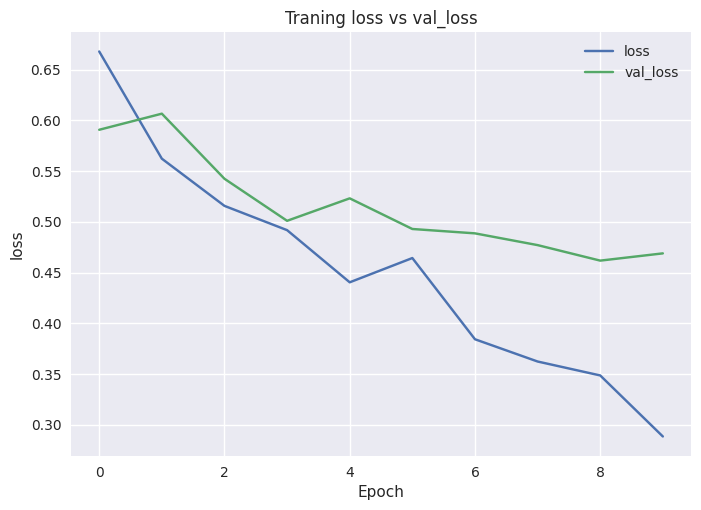

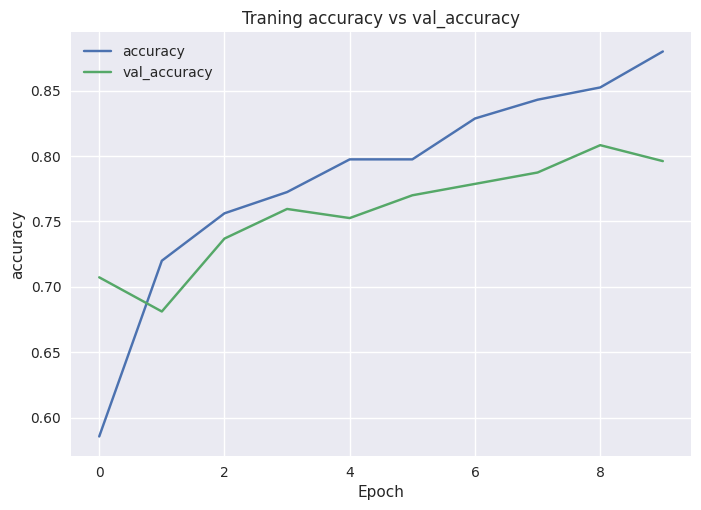

In [8]:
plot_val_and_training(history, ["loss", "val_loss"])
plot_val_and_training(history, ["accuracy", "val_accuracy"])


As can be seen from both the loss and the accuracy, the model overfits from the second or third epoch and onwards. In the case of accuracy, the training accuracy increases with each epoch until the model basically has memorized all the different data points based on their detailed values. If we kept training the model it would slowly approach an accuracy of 1 during training. The validation is a different story, it first improves as the model becomes better at recognizing cars, but after a certain level, the model doesn't generalize as well anymore and the score stagnates. Similar is the case of the loss score. For training, the loss decreases as the model continues to minimize the loss function, but for the validation score, it goes back up again to around the initial level.  

# Data augmentation

In [9]:
# Augment training data
data_gen_augment = ImageDataGenerator(rescale=1.0/255, rotation_range = 30, shear_range = 2, channel_shift_range = 0.5, horizontal_flip = True)

imgdir = 'a5_images' 
img_size = 64
batch_size = 32

train_generator_aug = data_gen_augment.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


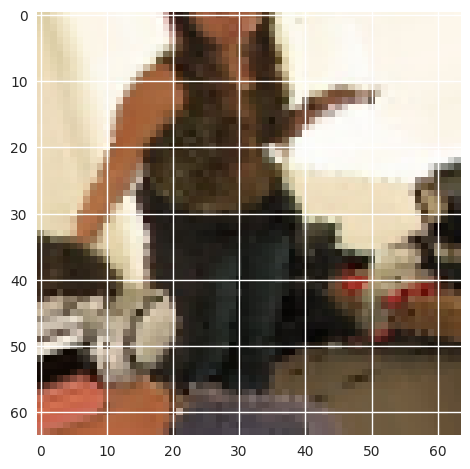

In [10]:
# Get a batch of images and show a random augmented image
Xbatch, Ybatch = train_generator_aug.next()
plt.imshow(Xbatch[13]);


Epoch 1/10
50/50 [==============================] - 29s 578ms/step - loss: 0.6635 - accuracy: 0.6131 - val_loss: 0.6610 - val_accuracy: 0.6307
Epoch 2/10
50/50 [==============================] - 29s 581ms/step - loss: 0.5964 - accuracy: 0.6894 - val_loss: 0.5915 - val_accuracy: 0.6882
Epoch 3/10
50/50 [==============================] - 29s 578ms/step - loss: 0.5477 - accuracy: 0.7344 - val_loss: 0.5995 - val_accuracy: 0.7056
Epoch 4/10
50/50 [==============================] - 29s 573ms/step - loss: 0.5194 - accuracy: 0.7506 - val_loss: 0.5729 - val_accuracy: 0.7282
Epoch 5/10
50/50 [==============================] - 29s 574ms/step - loss: 0.5069 - accuracy: 0.7538 - val_loss: 0.5188 - val_accuracy: 0.7509
Epoch 6/10
50/50 [==============================] - 28s 563ms/step - loss: 0.4886 - accuracy: 0.7669 - val_loss: 0.6965 - val_accuracy: 0.7195
Epoch 7/10
50/50 [==============================] - 28s 560ms/step - loss: 0.4752 - accuracy: 0.7688 - val_loss: 0.4866 - val_accuracy: 0.7735

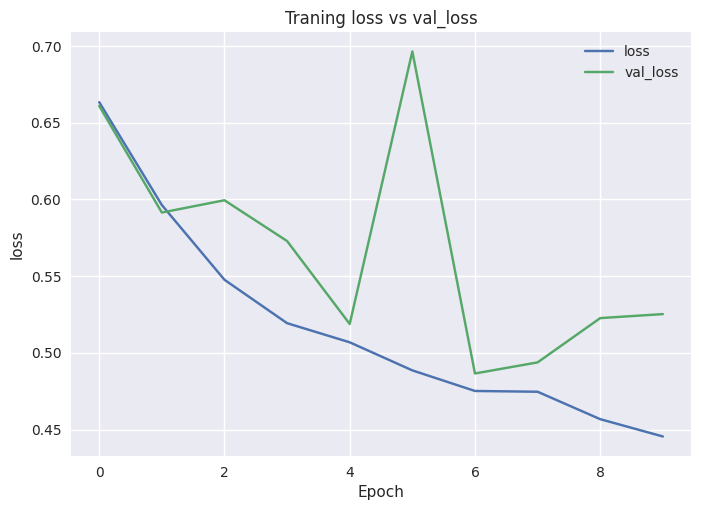

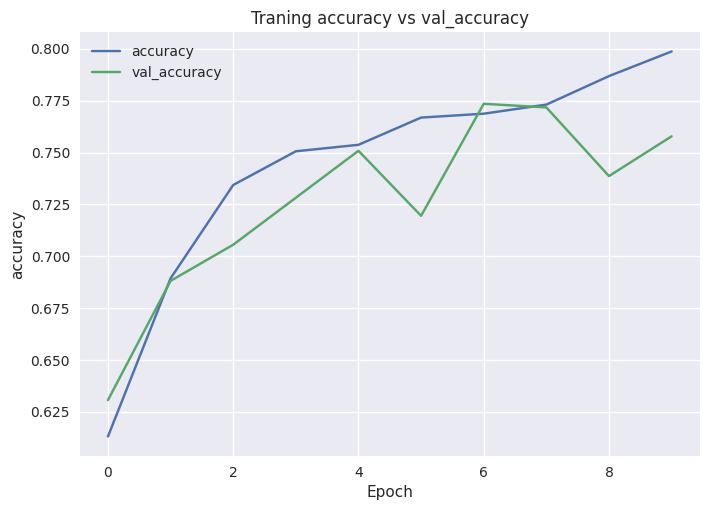

In [11]:
# Create and train model using augmented data
convnet_augment = make_convnet()
augment_history = convnet_augment.fit(train_generator_aug, batch_size = batch_size, epochs = nr_of_epochs, validation_data = validation_generator)

# Create plots
print("Plots using augmented data:")
plot_val_and_training(augment_history, ["loss", "val_loss"])
plot_val_and_training(augment_history, ["accuracy", "val_accuracy"])

Do you see an improvement on the validation set?

After having tried several different configurations of the parameters in ImageDataGenerator that have an effect on data augmentation we have come to the conclusion that we can not improve the model a lot. There is not that much of an improvement of the validation accuracy but more of an improvement on the validation loss, with approximately 0.1 better loss score. Also, the plots do not show the same signs of overfitting as previously. Both the validation loss and accuracy keep decreasing as the number of epochs grows. This suggests that the model learns to generalize better after the data augmentation, which was our goal.

# Interlude: Applying a pre-trained convolutional neural network

In [12]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 5s 0us/step


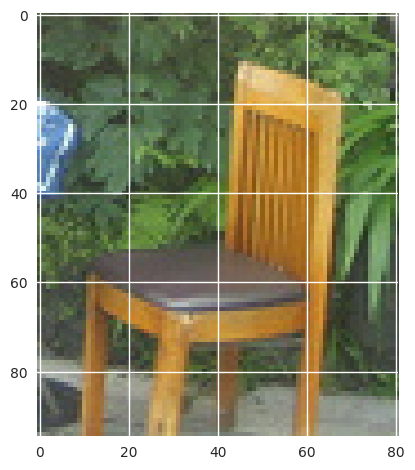

In [13]:
from matplotlib import image as mpimg
im = mpimg.imread('a5_images/validation/other/0019.jpg')
plt.imshow(im)

In [14]:
# Load image of a chair
file_name = 'a5_images/validation/other/0019.jpg'

img = load_img(file_name, target_size=(224,224))
img_array = img_to_array(img)

processed_img = preprocess_input(img_array)
image_to_classify = processed_img.reshape(1, 224, 224, 3)

In [15]:
# Make prediction
y_pred = vggmodel.predict(image_to_classify)
label = decode_predictions(y_pred)
label = label[0][:5]

# Print top 5 predictions
for l in label:
    print('%s (%.2f%%)' % (l[1], l[2]*100))

35363/35363 [==============================] - 0s 0us/step
dining_table (13.56%)
folding_chair (9.20%)
patio (9.17%)
rocking_chair (4.93%)
yurt (3.74%)


Does the prediction make sense?

Yes it makes sense. The image that we choose to classify was of a dining table chair and the most probable classification was "dining table". The second most probable was "folding chair" which is also a good classification of the image. All in all, the top 5 predictions of the image are somewhat related to the image itself which is good. However, the predictions were not completely correct. We do not know if there even is a label "chair" included in the model though.

# Using VGG-16 as a feature extractor

In [16]:
# Load new VGG16 model
feature_extractor = applications.VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
def create_vgg16_features(directory):
    # Create generator
    vgg16_generator = vgg_data_gen.flow_from_directory(
            imgdir + '/{}'.format(directory),
            target_size=(img_size, img_size),
            batch_size=batch_size,
            class_mode='binary',
            classes=['other', 'car'],
            seed=12345,
            shuffle=False)
    
    cnn_features = feature_extractor.predict(vgg16_generator)

    with open("cnn_features_{}_jonas".format(directory), 'wb') as f:
        np.save(f, cnn_features)

In [18]:
create_vgg16_features("train")
create_vgg16_features("validation")

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 73s 1s/step
Found 574 images belonging to 2 classes.
18/18 [==============================] - 26s 1s/step


In [19]:
# Helper function
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [20]:
def train_on_cnnfeatures(train_file, validation_file):
    with open(train_file, 'rb') as f:
        training_data = np.load(f)

    with open(validation_file, 'rb') as f:
        validation_data = np.load(f)

    # Create target labels
    y_train = get_labels(len(training_data))
    y_val = get_labels(len(validation_data))

    # Using the same dense layer structure as before
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    history = model.fit(training_data, y_train, epochs = nr_of_epochs, validation_data = (validation_data, y_val))

    plot_val_and_training(history, ["loss", "val_loss"])
    plot_val_and_training(history, ["accuracy", "val_accuracy"])

Epoch 1/10
50/50 [==============================] - 1s 13ms/step - loss: 1.3805 - accuracy: 0.8369 - val_loss: 0.7305 - val_accuracy: 0.8746
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.1931 - accuracy: 0.9550 - val_loss: 0.6479 - val_accuracy: 0.8885
Epoch 3/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.6607 - val_accuracy: 0.9024
Epoch 4/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.6113 - val_accuracy: 0.9042
Epoch 5/10
50/50 [==============================] - 1s 10ms/step - loss: 4.5488e-04 - accuracy: 1.0000 - val_loss: 0.6217 - val_accuracy: 0.9059
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 3.3453e-04 - accuracy: 1.0000 - val_loss: 0.6286 - val_accuracy: 0.9059
Epoch 7/10
50/50 [==============================] - 0s 9ms/step - loss: 2.6534e-04 - accuracy: 1.0000 - val_loss: 0.6340 - val_accuracy: 0.9059
Epoch

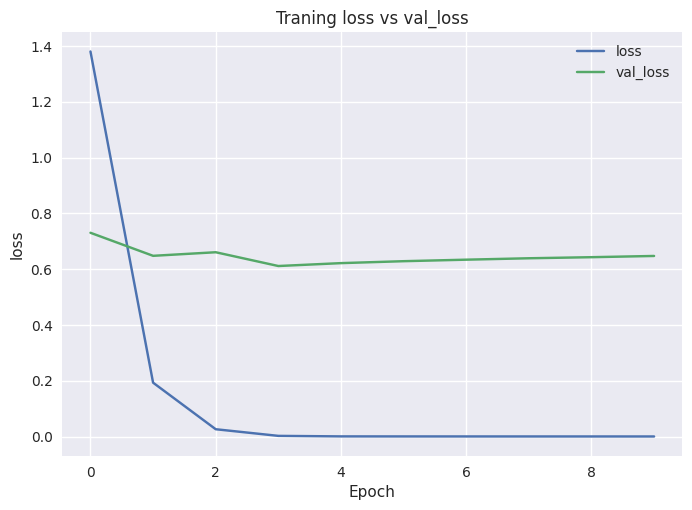

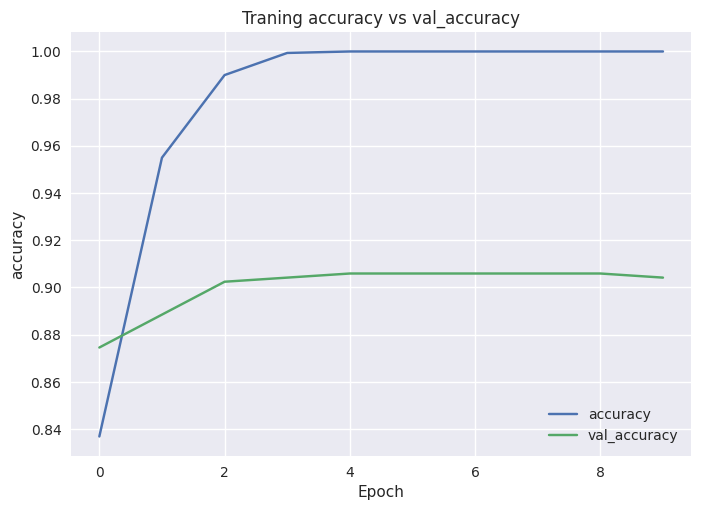

In [21]:
train_on_cnnfeatures("/work/cnn_features_train_jonas", "/work/cnn_features_validation_jonas")

This time we get a much higher accuracy, while still using the same architecture for the dense layers as before. The training accuracy quickly reaches 100% and the validation accuracy becomes approximately 90%. However, the validation accuracy does not improve significantly from the first epoch to the last. Why that is, is hard to say. 

The reason for the difference in accuracy is probably that the features from the convolutional part of the network are better, and the patterns are more meaningful and sophisticated. VGG16 has also been tuned to perform well at dicerning between different image objects, as well as being trained on many, many more images which these kind of models need for good performance. As the VGG16 model has a more complex and tuned architecture than ours, it is not unreasonable that we get the results that we get.

# Visualizing the learned features

In [22]:
# Helper function given in the assignment
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [23]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [24]:
def compare_convolutions(weights, filter_indexes):

    for i in filter_indexes:
        k_true = kernel_image(weights, i, True)
        k_false = kernel_image(weights, i, False)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
        fig.suptitle('Filter number {}'.format(i))
        ax1.imshow(k_true)
        ax1.set_title("Positive pattern")
        ax2.imshow(k_false)
        ax2.set_title("Negative pattern")
        fig.show()

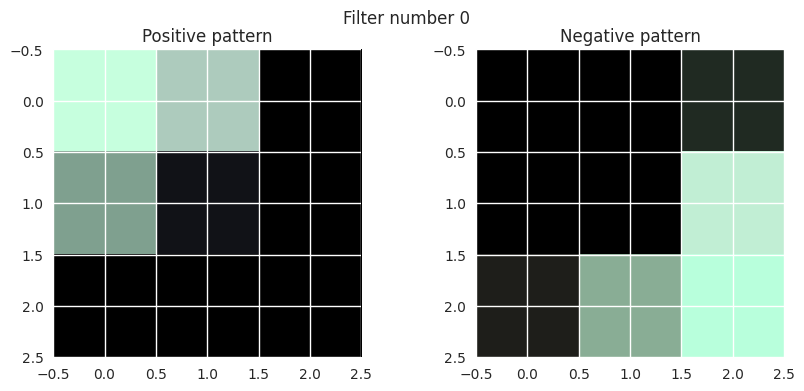

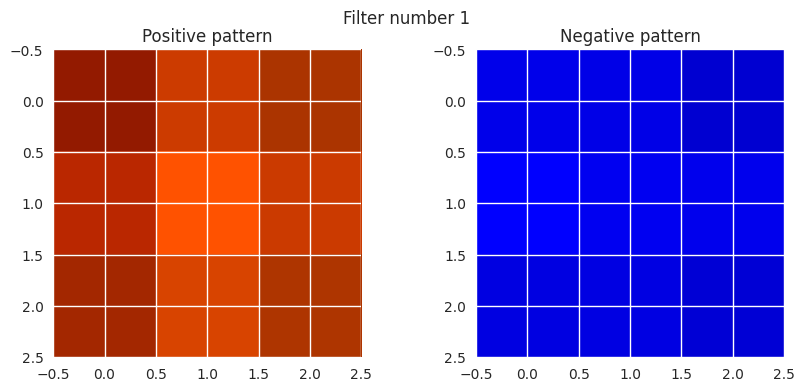

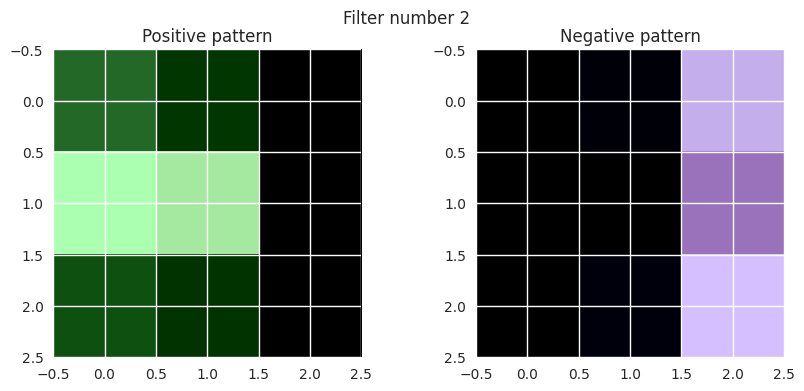

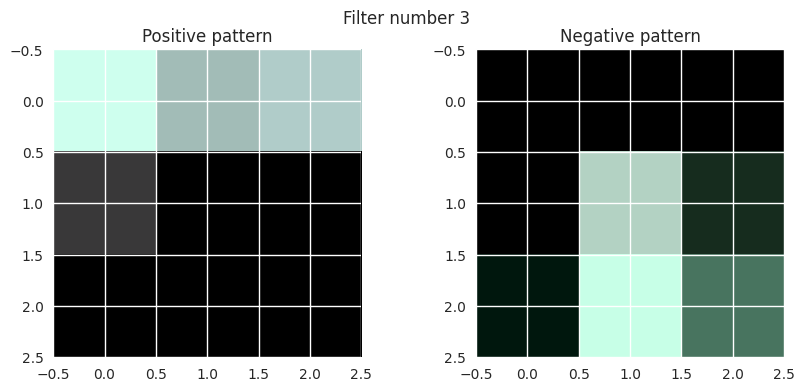

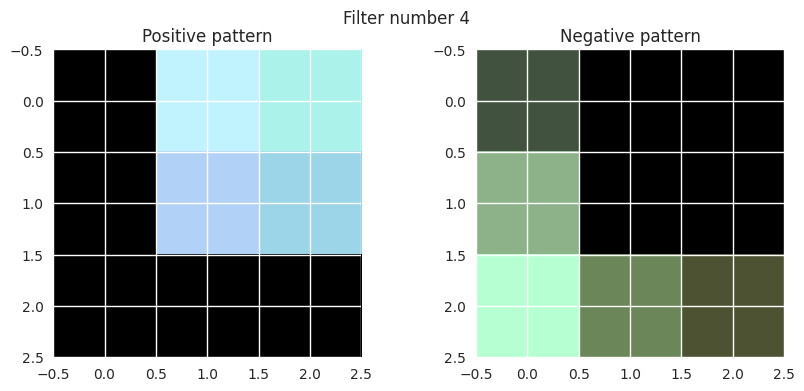

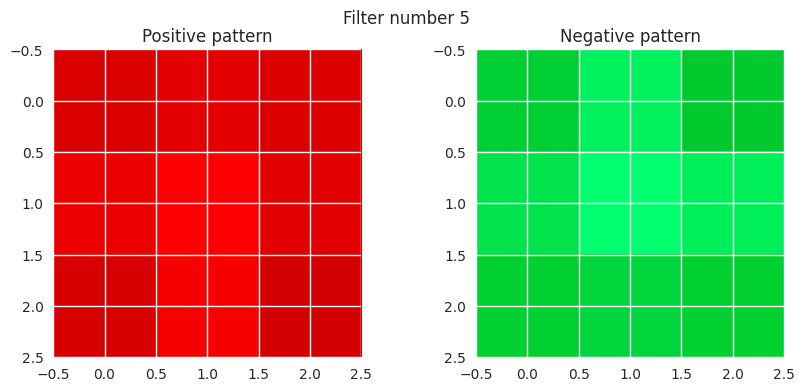

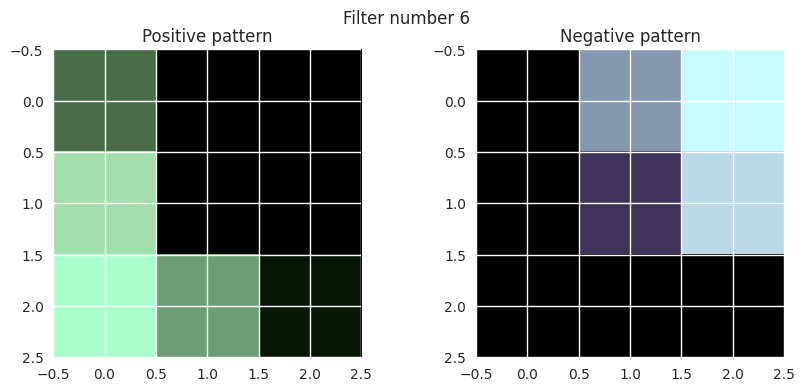

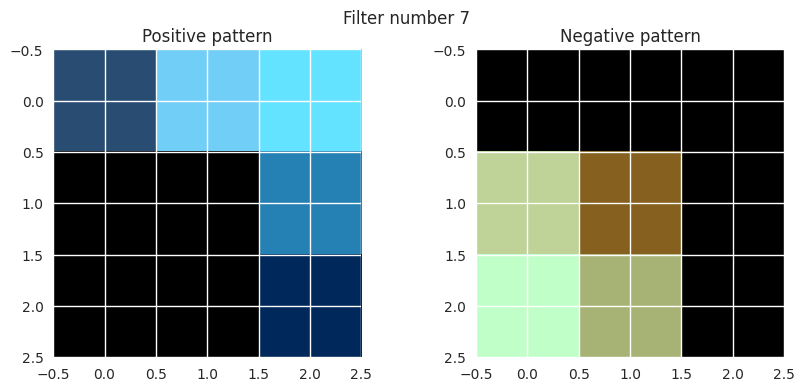

In [25]:
# Visualize some of the patterns used by the first convolutional layer
first_eight = list(range(8))
even_spread = list(range(0,63, 8))
last_eight = list(range(55,63))

compare_convolutions(vggmodel.get_weights()[0], first_eight)

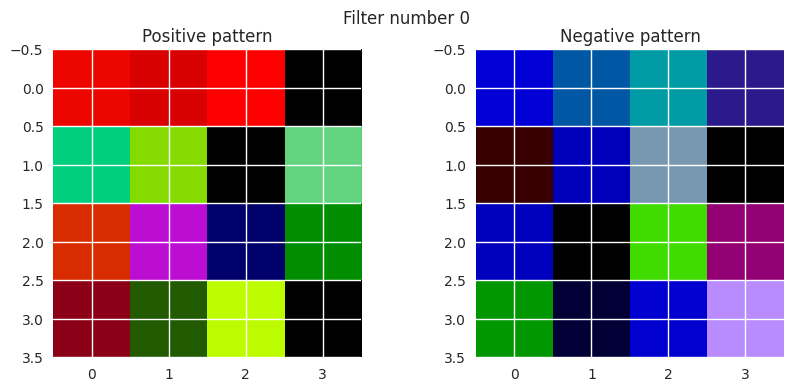

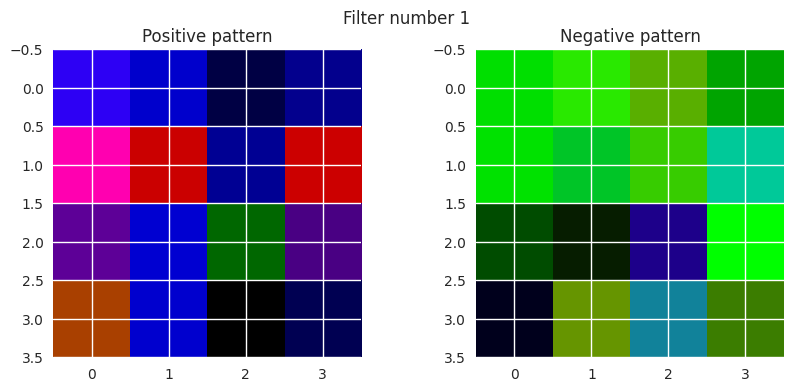

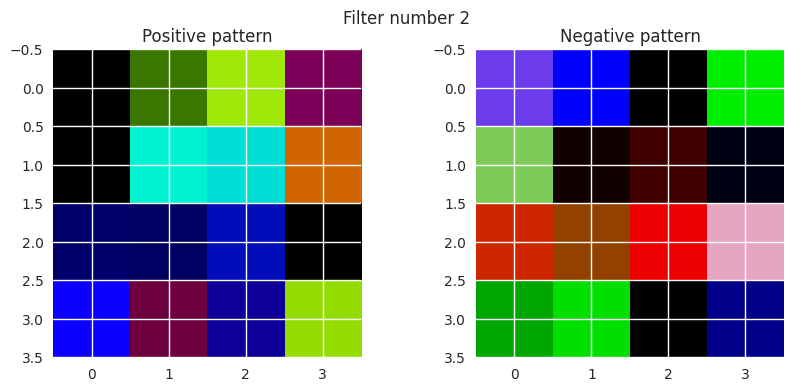

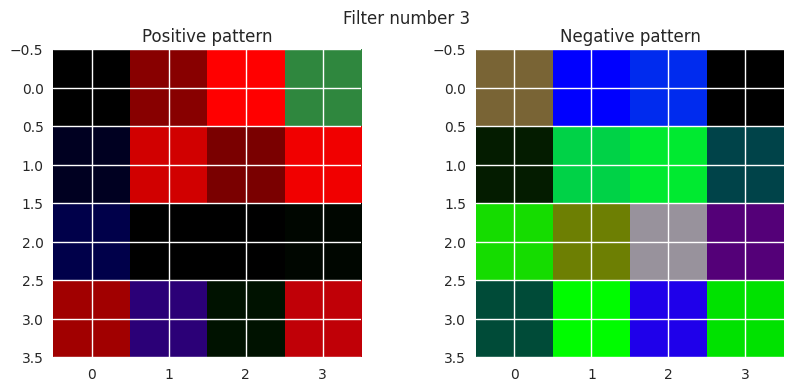

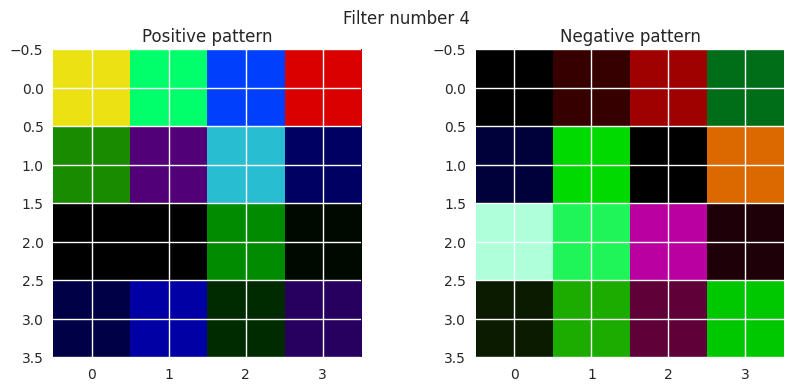

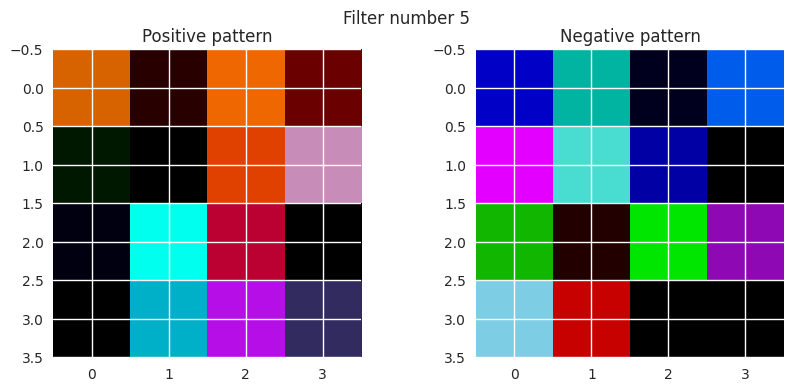

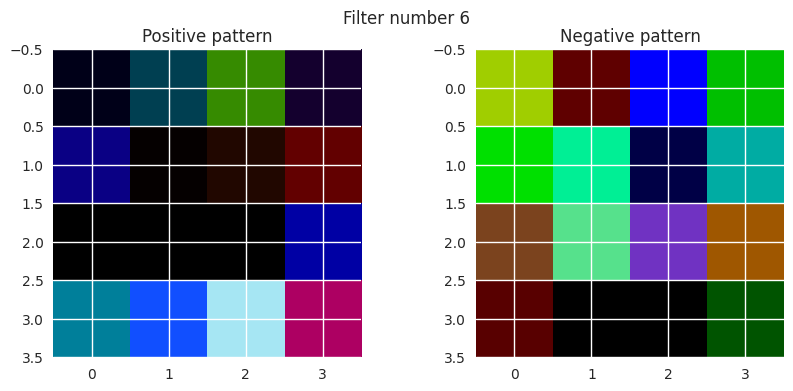

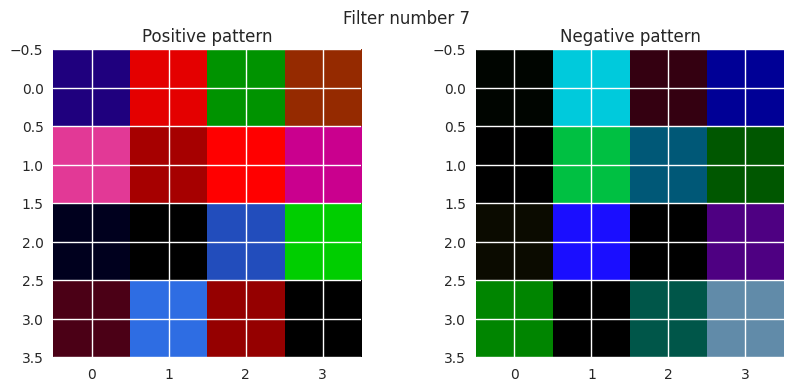

In [26]:
#visualize the patterns of our first CNN
# again on the first convolutional layer
first_eight = list(range(8))
even_spread = list(range(0,63, 8))
last_eight = list(range(55,63))

compare_convolutions(convnet.get_weights()[0], first_eight)

For the VGG-model we notice that in most cases, the negative and positive patterns seem to complement each other, both in terms of shape and color. The colors of the positive and corresponding negative filter seem to always be complementary colors in the color wheel. Clear patterns and gradients can be identified along certain parts of the image representation and they share the same color. 

We then print the weights for the first layer in our own construction of a CNN. Here we see a different visualization which is really hard to interpret as anything else as random patterns. There is still some complementing between the positive and negative weights as the higher (stronger colors) values are found in the opposite positions. 

Our conclusion from this test is that the weights shown from our own implementation represent the weights of a poorly trained CNN, and that the pattern shown from the VGG-model first will show after additional training on a larger dataset. This seems like an explanation for why the pre-trained model can perform with accuracy levels of around 90% while the first CNN only reached ≈78%. The pre-trained model shows patterns that seem much more stable and that will probably help the model with more sophisticated image analysis. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a2f6166-b39d-417b-9119-b5ef86702171' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>